In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import linregress
import scipy.stats as st

bitcoin = "BTC-USD.csv"
bitcoin_df = pd.read_csv(bitcoin)
print(bitcoin_df.head())

#pulling data for Wenatchee data center
washington_weather_df = pd.read_csv("../Group Project 1/WashingtonDataCenter.csv")
washington_weather_df.head(10)

         Date        Open        High         Low       Close   Adj Close  \
0  10/30/2016  714.117981  714.117981  696.474976  701.864014  701.864014   
1  10/31/2016  702.640015  709.289001  691.682007  700.971985  700.971985   
2   11/1/2016  701.336975  736.452026  701.336975  729.793030  729.793030   
3   11/2/2016  730.065979  740.828979  722.348999  740.828979  740.828979   
4   11/3/2016  742.346008  745.773010  678.156006  688.700012  688.700012   

        Volume  
0  100665000.0  
1   97064400.0  
2  130527000.0  
3   84865200.0  
4  172808000.0  


,Date,Max Temp,Avg Temp,Min Temp
0,Aug-13,84.2,71.6,46.4
1,Jan-14,35.6,28.4,19.4
2,Aug-14,86.0,71.6,48.2
3,Jan-15,39.2,32.0,21.2
4,Aug-15,87.8,75.2,51.8
5,Jan-16,35.6,28.4,17.6
6,Aug-16,86.0,75.2,51.8
7,17-Jan,28.4,17.6,3.2
8,17-Aug,91.4,78.8,53.6
9,18-Jan,39.2,33.8,24.8


In [2]:
#pulling data for Reykjavik data center
iceland_weather_df = pd.read_csv("../Group Project 1/Reykjavik Iceland Data Center.csv")
iceland_weather_df.head(10)

,Date,Max Temp,Avg Temp,Min Temp
0,Jan-11,33.8,33.8,30.2
1,Aug-11,57.2,53.6,46.4
2,Jan-12,35.6,32.0,28.4
3,Aug-12,59.0,55.4,50.0
4,Jan-13,37.4,35.6,33.8
5,Aug-13,53.6,51.8,46.4
6,Jan-14,37.4,35.6,32.0
7,Aug-14,57.2,53.6,48.2
8,Jan-15,33.8,32.0,28.4
9,Aug-15,57.2,53.6,48.2


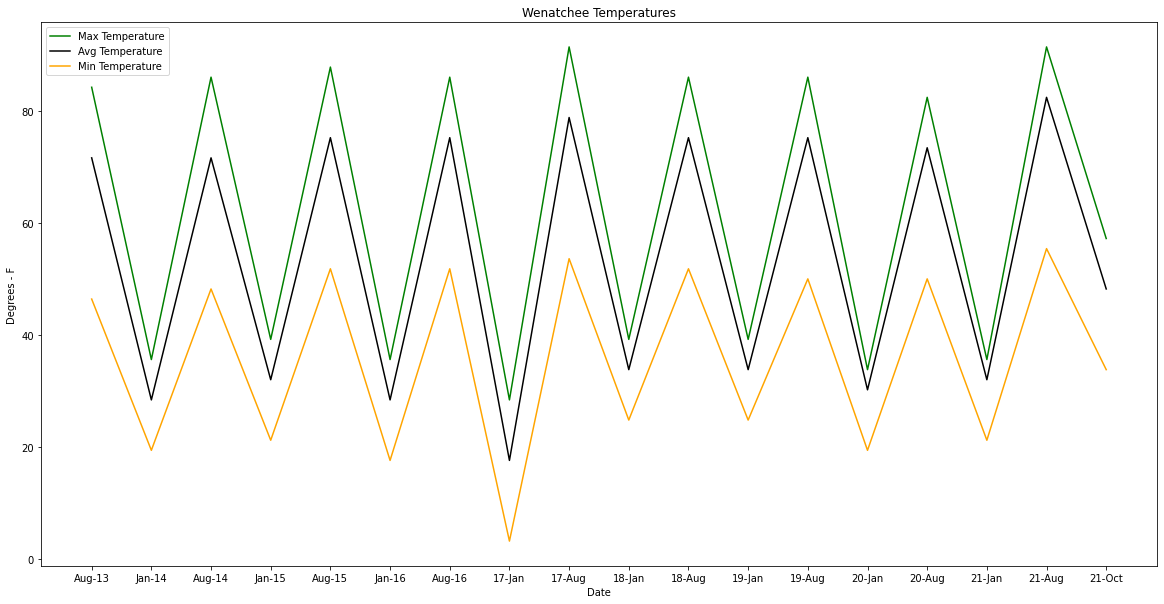

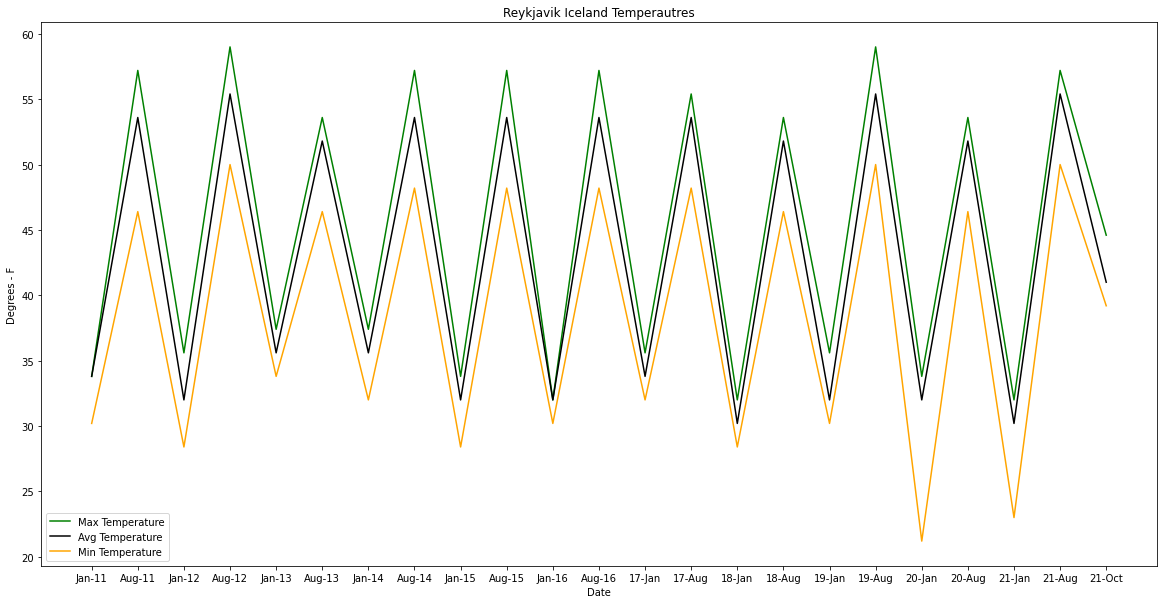

In [3]:
#plotting linegraphs for  min, avg, and max temps for two of the largest crypto mining centeres
dates = washington_weather_df["Date"]
MaxTemp = washington_weather_df["Max Temp"]
AvgTemp = washington_weather_df["Avg Temp"]
MinTemp = washington_weather_df["Min Temp"]

plt.figure(figsize=(20, 10))

plt.plot(dates, MaxTemp, color="green", label="Max Temperature")
plt.plot(dates, AvgTemp, color="black", label="Avg Temperature")
plt.plot(dates, MinTemp, color="orange", label="Min Temperature")
plt.legend(loc="best")
plt.title("Wenatchee Temperatures")
plt.xlabel("Date")
plt.ylabel("Degrees - F")
plt.show()

dates = iceland_weather_df["Date"]
MaxTemp = iceland_weather_df["Max Temp"]
AvgTemp = iceland_weather_df["Avg Temp"]
MinTemp = iceland_weather_df["Min Temp"]

plt.figure(figsize=(20, 10))

plt.plot(dates, MaxTemp, color="green", label="Max Temperature")
plt.plot(dates, AvgTemp, color="black", label="Avg Temperature")
plt.plot(dates, MinTemp, color="orange", label="Min Temperature")
plt.legend(loc="best")
plt.title("Reykjavik Iceland Temperautres")
plt.xlabel("Date")
plt.ylabel("Degrees - F")
plt.show()

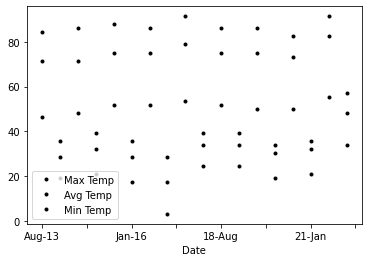

In [4]:

series = pd.read_csv("../Group Project 1/WashingtonDataCenter.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(style='k.')
plt.show()

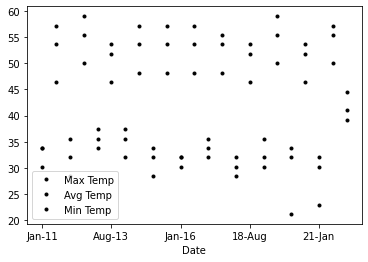

In [5]:
series = pd.read_csv("../Group Project 1/Reykjavik Iceland Data Center.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(style='k.')
plt.show()

In [6]:
weather_merge = pd.merge(washington_weather_df, iceland_weather_df, how="inner", on="Date")
weather_merge = weather_merge.rename(columns={"Date":"Date","Max Temp_x":"Max Temp Wenatchee", "Avg Temp_x": "Avg Temp Wenatchee", "Min Temp_x": "Min Temp Wenatchee", "Max Temp_y": "Max Temp Reykjavik", "Avg Temp_y": "Avg Temp Reykjavik", "Min Temp_y": "Min Temp Reykjavik"})
weather_merge = weather_merge.dropna()         
weather_merge

,Date,Max Temp Wenatchee,Avg Temp Wenatchee,Min Temp Wenatchee,Max Temp Reykjavik,Avg Temp Reykjavik,Min Temp Reykjavik
0,Aug-13,84.2,71.6,46.4,53.6,51.8,46.4
1,Jan-14,35.6,28.4,19.4,37.4,35.6,32.0
2,Aug-14,86.0,71.6,48.2,57.2,53.6,48.2
3,Jan-15,39.2,32.0,21.2,33.8,32.0,28.4
4,Aug-15,87.8,75.2,51.8,57.2,53.6,48.2
5,Jan-16,35.6,28.4,17.6,32.0,32.0,30.2
6,Aug-16,86.0,75.2,51.8,57.2,53.6,48.2
7,17-Jan,28.4,17.6,3.2,35.6,33.8,32.0
8,17-Aug,91.4,78.8,53.6,55.4,53.6,48.2
9,18-Jan,39.2,33.8,24.8,32.0,30.2,28.4


<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

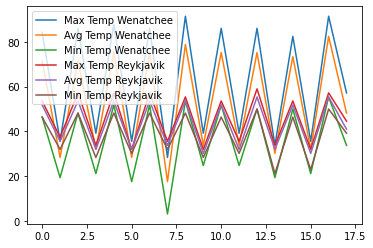

In [25]:
#merged temperature comparison
plt.figure(figsize=(10, 5))

weather_merge.plot()

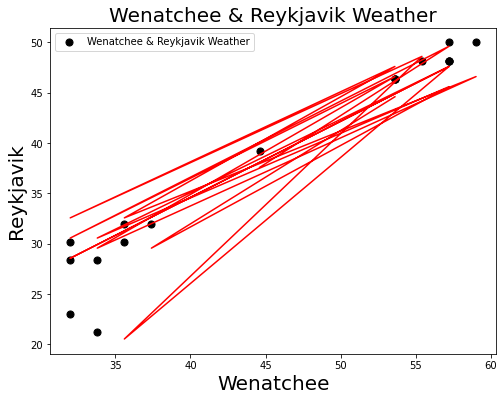

0.9059694990303833

In [24]:
## scatter plot of merged datasets
wenatchee_dc = weather_merge["Max Temp Wenatchee"]
wenatchee_dc = weather_merge["Avg Temp Wenatchee"]
wenatchee_dc = weather_merge["Min Temp Wenatchee"]

reykjavik_dc = weather_merge["Max Temp Reykjavik"]
reykjavik_dc = weather_merge["Avg Temp Reykjavik"]
reykjavik_dc = weather_merge["Min Temp Reykjavik"]

plt.figure(figsize=(8, 6))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(wenatchee_dc, reykjavik_dc)
regress_values = slope * wenatchee_dc + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(bit_close_price, nvda_close_price, color="black", s=50, label="Wenatchee & Reykjavik Weather")
plt.plot(bit_close_price,regress_values,"r-")

plt.legend(loc="best", fontsize=10)
plt.title("Wenatchee & Reykjavik Weather", fontsize=20)
plt.xlabel("Wenatchee", fontsize=20)
plt.ylabel("Reykjavik", fontsize=20)

correlation = st.pearsonr(wenatchee_dc, reykjavik_dc)
plt.show()
correlation[0]